In [161]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [162]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv(r"F:\EDS_new\EDS-Covid-19-Project-\EDS\eds_covid-19\data\processed\processed\COVID_small_flat_table.csv",sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [163]:
df_analyse.Germany[35]

27

In [164]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.4   # infection spread dynamics
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [165]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

# Simulative approach to calculate SIR curves

In [166]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
    new_delta_vec=SIR_model(SIR,beta,gamma)
    SIR=SIR+new_delta_vec
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\owner\AppData\Local\Temp\ipykernel_4716\3468111755.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\3468111755.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\3468111755.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\3468111755.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

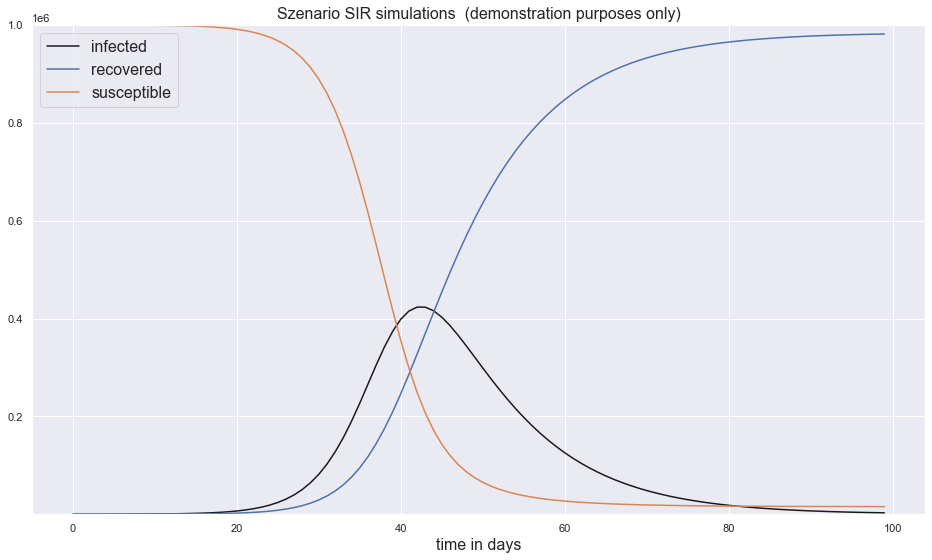

In [167]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [168]:
ydata = np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))

In [169]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [170]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [171]:
def fit_odeint(x, beta, gamma):
    
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [172]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([2.70000000e+01, 3.64457071e+01, 4.91956207e+01, 6.64053493e+01,
       8.96344660e+01, 1.20987564e+02, 1.63304428e+02, 2.20416326e+02,
       2.97491205e+02, 4.01498275e+02, 5.41832616e+02, 7.31153728e+02,
       9.86509149e+02, 1.33083608e+03, 1.79496099e+03, 2.42024936e+03,
       3.26209305e+03, 4.39445723e+03, 5.91573047e+03, 7.95611026e+03,
       1.06866705e+04, 1.43300301e+04, 1.91720581e+04, 2.55731545e+04,
       3.39761277e+04, 4.49053964e+04, 5.89492486e+04, 7.67139399e+04,
       9.87375269e+04, 1.25356226e+05, 1.56531317e+05, 1.91671801e+05,
       2.29519056e+05, 2.68172791e+05, 3.05306626e+05, 3.38543581e+05,
       3.65876662e+05, 3.85989183e+05, 3.98379367e+05, 4.03287154e+05,
       4.01494345e+05, 3.94088591e+05, 3.82258097e+05, 3.67146745e+05,
       3.49770632e+05, 3.30982618e+05, 3.11468385e+05, 2.91760020e+05,
       2.72257377e+05, 2.53251232e+05, 2.34945074e+05, 2.17474127e+05,
       2.00921199e+05, 1.85329524e+05, 1.70712933e+05, 1.57063815e+05,
      

In [173]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

standard deviation errors :  [0.0068261  0.00613411]  start infect: 27
Optimal parameters: beta = 0.41715058907367664  and gamma =  0.2029276103046262


c:\Users\owner\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [174]:
fitted=fit_odeint(t, *popt)

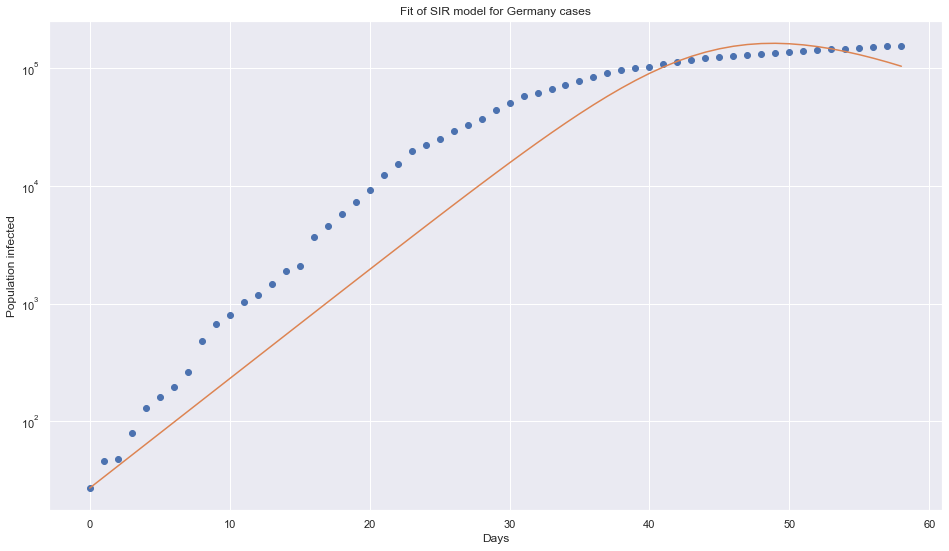

Optimal parameters: beta = 0.41715058907367664  and gamma =  0.2029276103046262
Basic Reproduction Number R0  2.055662058245638
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki



In [175]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki\n") 

# Dynamic beta in SIR (infection rate)

In [176]:
t_initial=21
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.37769231, 0.35538462, 0.33307692,
       0.31076923, 0.28846154, 0.26615385, 0.24384615, 0.22153846,
       0.19923077, 0.17692308, 0.15461538, 0.13230769, 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.1245    , 0.139     , 0.1535    ,
       0.168     , 0.1825    , 0.197     , 0.2115    , 0.226     ,
       0.2405    , 0.255     , 0.2695    , 0.284     , 0.2985    ,
       0.313     , 0.3275    , 0.342     , 0.3565    , 0.371  

In [177]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\owner\AppData\Local\Temp\ipykernel_4716\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

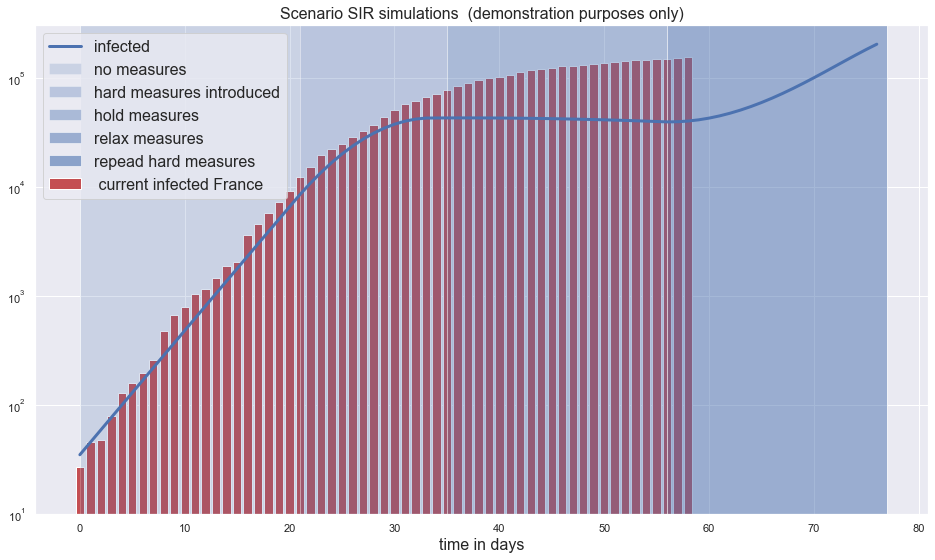

In [178]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected France',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [179]:
data_path ='F:/EDS_new/EDS-Covid-19-Project-/EDS/eds_covid-19/data/raw/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_path_population ='F:/EDS_new/EDS-Covid-19-Project-/EDS/eds_covid-19/data/raw/csse_covid_19_time_series/population.csv'

In [180]:
df_raw = pd.read_csv(data_path)
df_population_count = pd.read_csv(data_path_population)

# extract the country list from the raw data frame and analyse the date column
country_list = df_raw['Country/Region'].unique()
date=df_raw.columns[4:]
df_analyse=pd.DataFrame({'Date':date})

for country in country_list:
    df_analyse[country] = np.array(df_raw[df_raw['Country/Region'] == country].iloc[:,4::].sum(axis=0)).T
df_analyse.to_csv('F:/EDS_new/EDS-Covid-19-Project-/EDS/eds_covid-19/data/raw/csse_covid_19_time_series/SIR.csv',index=False)

df_analyse.sort_values('Date',ascending=True).head()
a=list(df_population_count['Pop'])

C:\Users\owner\AppData\Local\Temp\ipykernel_4716\98020932.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[country] = np.array(df_raw[df_raw['Country/Region'] == country].iloc[:,4::].sum(axis=0)).T
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\98020932.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_analyse[country] = np.array(df_raw[df_raw['Country/Region'] == country].iloc[:,4::].sum(axis=0)).T
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\98020932.py:10: PerformanceWarning: DataFrame is highly fra

In [181]:
N0=1000000 #max susceptible population as shown in the lecture taken random
beta=0.4   # infection spread dynamic
gamma=0.1  # recovery rate

In [182]:
df_data=df_analyse[35:]
t=np.arange(df_data.shape[0])
print(df_data)
print(t)

        Date  Afghanistan  Albania  Algeria  Andorra  Angola  Antarctica  \
35   2/26/20            5        0        1        0       0           0   
36   2/27/20            5        0        1        0       0           0   
37   2/28/20            5        0        1        0       0           0   
38   2/29/20            5        0        1        0       0           0   
39    3/1/20            5        0        1        0       0           0   
..       ...          ...      ...      ...      ...     ...         ...   
884  6/24/22       182033   278504   266025    43774   99761          11   
885  6/25/22       182072   278793   266030    43774   99761          11   
886  6/26/22       182149   279077   266038    43774   99761          11   
887  6/27/22       182228   279077   266049    43774   99761          11   
888  6/28/22       182324   279167   266062    43774  101320          11   

     Antigua and Barbuda  Argentina  Armenia  ...  Uruguay  Uzbekistan  \
35           

In [183]:
R0=0
df_data.columns

Index(['Date', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', length=200)

In [184]:
for country in df_data.columns[1:]:
    y_data=np.array(df_data[df_data[country]>0][country])
    print(y_data)

[     5      5      5      5      5      5      5      5      5      5
      8      8      8      8     11     11     11     14     20     25
     26     26     26     24     24     34     40     42     74     80
     91    106    114    114    166    192    235    269    270    299
    337    367    423    444    521    521    555    607    665    770
    794    845    908    933    996   1026   1092   1176   1226   1330
   1463   1531   1703   1827   1827   2171   2469   2469   2469   2469
   3224   3392   3563   3563   4402   4664   4967   4967   5339   6053
   6402   6635   7072   7655   8145   8676   9216   9952  10668  11180
  11917  12465  13102  13745  14529  15180  15836  16578  17353  17977
  19055  19637  20428  21003  21308  22228  22976  23632  24188  24852
  25613  25719  26960  27423  27964  28383  28919  29229  29567  29726
  30261  30346  30702  31053  31324  31445  31848  32108  32410  32758
  33037  33150  33470  33680  33739  34280  34437  34537  34541  34826
  3502

In [185]:
for country in df_data.columns[1:]:
    y_data=np.array(df_data[df_data[country]>0][country])
    t=np.arange(len(y_data))
    print(t)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [186]:
print(N0)
I0=y_data[0]
print(I0)
S0=N0-I0
print(S0)
popt=[0.4,0.1]
print(len(popt))
fit_odeint(t, *popt)
len(fit_odeint(t, *popt))

1000000
1
999999
2


831

In [187]:
N0=1000000 #max susceptible population as shown in the lecture taken random
beta=0.4   # infection spread dynamic
gamma=0.1  # recovery rate

df_data=df_analyse[35:]
t=np.arange(df_data.shape[0])
# condition I0+S0+R0=N0

R0=0

#for i in a:
    
#    N0=int(i)
    
for country in df_data.columns[1:]:
    y_data=np.array(df_data[df_data[country]>0][country])
    t=np.arange(len(y_data))

    I0=y_data[0]
    S0=N0-I0
    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    popt, pcov = optimize.curve_fit(fit_odeint, t, y_data, maxfev=500000)
    perr = np.sqrt(np.diag(pcov))
    fitted=fit_odeint(t, *popt)
    fitted_pad = np.concatenate((np.zeros(df_data.shape[0]-len(fitted)) ,fitted))
    df_data[country + '_fitted'] = fitted_pad

df_data = df_data.reset_index(drop=True)
df_data.to_csv('F:/EDS_new/EDS-Covid-19-Project-/EDS/eds_covid-19/data/processed/processed/SIR_fitted_curve.csv')

c:\Users\owner\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\784481391.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data[country + '_fitted'] = fitted_pad
c:\User

In [188]:
import random
color_list = []
for i in range(200):
    var = '#%02x%02x%02x'%(random.randint(0,255),random.randint(0,255),random.randint(0,255))
    color_list.append(var)

print(color_list)
print(len(color_list))

['#0e3496', '#e15a1d', '#03bcc8', '#b26052', '#c994f8', '#cb72f1', '#c27deb', '#7c2133', '#2b9bc0', '#a04a00', '#edd62e', '#15bb36', '#19e21c', '#619f9c', '#69d21e', '#d27510', '#a28975', '#2b926b', '#3298e5', '#3c3298', '#7a31e5', '#901ddb', '#2ddd04', '#1705d2', '#aad97a', '#18a825', '#4e513b', '#394843', '#caf7d6', '#6b5e9a', '#5f0641', '#302bd5', '#76fe96', '#b16dad', '#8c3481', '#a736a9', '#943a79', '#0e1b7b', '#3806f4', '#6eef3b', '#e58ca2', '#b2f063', '#8e5eb8', '#27c072', '#106a84', '#f24489', '#ab0f1e', '#d4931b', '#285e1b', '#82a0ab', '#a741be', '#86a97e', '#0dc228', '#ce89e3', '#d5ae56', '#941396', '#f6f112', '#186442', '#d1f2f1', '#1fa83a', '#76c2c2', '#eee9bc', '#ba1e1f', '#d40b86', '#5bba07', '#56fd91', '#717ab8', '#f70e0a', '#d67ad3', '#08675f', '#7b704a', '#e6858c', '#ae415c', '#ae46c8', '#13a0cd', '#1f7d49', '#8eaa30', '#7bc957', '#352d76', '#d87639', '#bf0ca3', '#20b847', '#f367f1', '#f56f7a', '#b514cd', '#f7e982', '#21207c', '#a3941f', '#c586e2', '#890853', '#5d261a'

In [189]:
import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go


# creating dashboard app containig plotting of source and fitted SIR curve data for whole dataset
fig = go.Figure()
app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  Data Science SIR Modelling
    
    * This dashboard plots two curves for each country:
    
    The first curve represents the confirmed infected cases along the timeline.
    The second curve represents the simulated infected cases after applying the SIR model along the timeline. 
    
    '''),

    dcc.Markdown('''
    ## Multi-Select Country for visualization from the dropdown
    '''),
    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_data.columns[1:200]],
        value=['India','France', 'China'], # which are pre-selected
        multi=True),
    dcc.Graph(figure=fig, id='main_window_slope')])


@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    v = 0
    my_yaxis={'type':"log",'title':'Infected people'}
    traces = []
    for each in country_list:
        traces.append(dict(x=df_data['Date'],y=df_data[each],
                                mode='line', line = dict(color = color_list[v]), opacity=1.0,name=each))
        traces.append(dict(x=df_data['Date'],
                                y=df_data[each+'_fitted'],
                                mode='lines+markers',line = dict(color=color_list[v]), opacity=1.0,name=each+'_simulated'))

        v = v+1
    return {
            'data': traces,
            'layout': dict (
                width=1280,height=720,
                xaxis={'title':'Timeline','tickangle':-45,'nticks':20,
                'tickfont':dict(size=14,color="#0c6887"),},yaxis=my_yaxis)}

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

C:\Users\owner\AppData\Local\Temp\ipykernel_4716\3142191350.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\owner\AppData\Local\Temp\ipykernel_4716\3142191350.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
